In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from sklearn.datasets import make_classification

In [120]:
x,y = make_classification(n_samples = 1000, n_features = 2, n_classes = 2, n_redundant = 0,
                         n_clusters_per_class = 2)
# on increasing the value of n_clusters_per_class overlapping of datapoints increase so accuracy decrease

In [121]:
x
x.shape

(1000, 2)

In [122]:
y
y.shape

(1000,)

<Axes: xlabel='0', ylabel='1'>

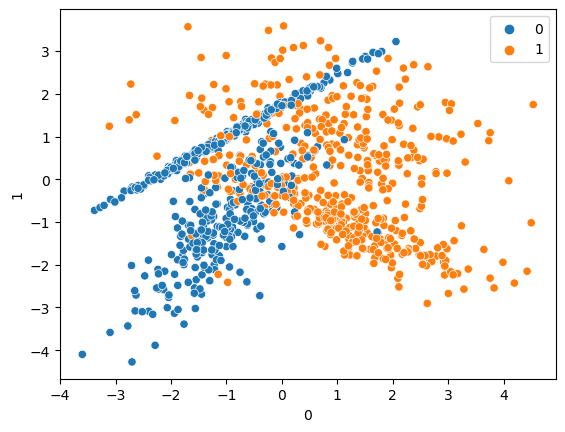

In [123]:
sns.scatterplot(x = pd.DataFrame(x)[0],y =  pd.DataFrame(x)[1] , hue = y)

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.20 , random_state =23)

In [126]:
# model train
from sklearn.svm import SVC

In [127]:
svc = SVC(kernel = 'linear')  # when datapoints are linearly seprable use kernal = 'linear'
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [128]:
y_pred = svc.predict(x_test)

In [129]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

In [130]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
cr = classification_report(y_test, y_pred)
print(cr)

0.79
[[78 17]
 [25 80]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        95
           1       0.82      0.76      0.79       105

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



In [131]:
# on increase overlapping or decrease accuracy we generally change the kernal type

In [132]:
rbf = SVC(kernel = 'rbf')  
rbf.fit(x_train, y_train)

SVC()

In [133]:
y_pred1 = rbf.predict(x_test)

In [134]:
score1 = accuracy_score(y_test, y_pred1)
print(score1)
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
cr1 = classification_report(y_test, y_pred1) 
print(cr1)        #accuracy increase by changing the kernal to rbf

0.84
[[81 14]
 [18 87]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        95
           1       0.86      0.83      0.84       105

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [135]:
# poly kernal 

In [136]:
poly = SVC(kernel = 'poly')  
poly.fit(x_train, y_train)

SVC(kernel='poly')

In [137]:
y_pred2 = poly.predict(x_test)

In [138]:
score2 = accuracy_score(y_test, y_pred2)
print(score2)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
cr2 = classification_report(y_test, y_pred2)
print(cr2)       #accuracy decrese by changing the kernal to poly

0.76
[[83 12]
 [36 69]]
              precision    recall  f1-score   support

           0       0.70      0.87      0.78        95
           1       0.85      0.66      0.74       105

    accuracy                           0.76       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.78      0.76      0.76       200



In [139]:
# sigmod kernal

In [140]:
sig = SVC(kernel = 'sigmoid')  
sig.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [141]:
y_pred3 = sig.predict(x_test)

In [142]:
score3 = accuracy_score(y_test, y_pred3)
print(score3)
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
cr3 = classification_report(y_test, y_pred3)
print(cr3)       #accuracy decrese by changing the kernal to sigmoid

0.705
[[65 30]
 [29 76]]
              precision    recall  f1-score   support

           0       0.69      0.68      0.69        95
           1       0.72      0.72      0.72       105

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200



In [143]:
# hyperparameter tunning

In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
params = {'C':[0.1,1,10,100,1000],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel':['rbf']}

In [180]:
grid = GridSearchCV(estimator=SVC(), param_grid=params, refit=True, cv=5, verbose=3)

# refit  = refit  set to true means the best hyperparameter combinations are used to undertake a fitting to the 
# training data. 

# verbose = n GridSearchCV, setting verbose controls the level of detail printed during the 
# cross-validation process. Higher values (e.g., verbose=1, verbose=2, etc.) give more detailed output 
# about the steps taken by the algorithm.

In [181]:
grid.fit(x_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.856 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.844 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.806 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.825 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.819 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.838 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.831 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.875 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.838 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.856 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.850 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 3/5] END ...C=1000, gamm

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [186]:
grid.best_params_
grid.best_score_

0.90625

In [184]:
#predition
Y_pred = grid.predict(x_test)
print(accuracy_score(y_test,Y_pred))
print (classification_report(y_test,Y_pred))
print(confusion_matrix(y_test,Y_pred))

0.86
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        95
           1       0.91      0.82      0.86       105

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

[[86  9]
 [19 86]]
